In [6]:
import pandas as pd
#%matplotlib notebook
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st
import sklearn.datasets as dta
import seaborn as sns
# Dependencies
import json
import requests


In [7]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)


In [8]:
topmovies_df.loc[:,"Gross"]=topmovies_df.loc[:,"Gross"].str.replace(",","").astype(float)

In [9]:
clean_movies_df=topmovies_df[['Poster_Link' , 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre','IMDB_Rating' ,'Overview' , 'Meta_score' , 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes' , 'Gross']].dropna()

clean_movies_df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [10]:
Gross= clean_movies_df["Gross"]/1000000
clean_movies_df["Gross"] = Gross

In [11]:
No_of_Votes= clean_movies_df["No_of_Votes"]/100000
clean_movies_df["No_of_Votes"] = No_of_Votes

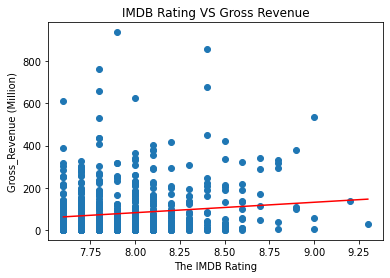

In [12]:
#Corrlation movie IMDB Rating Vs Gross Revenue by Rating
IMDB_Rating = clean_movies_df['IMDB_Rating']
Gross_Revenue = clean_movies_df['Gross']
x_values = IMDB_Rating
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("IMDB Rating VS Gross Revenue")
plt.xlabel('The IMDB Rating')
plt.ylabel('Gross_Revenue (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

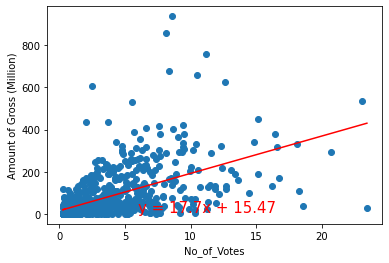

In [13]:
No_of_Votes = clean_movies_df['No_of_Votes']
Gross_Revenue = clean_movies_df['Gross']
x_values = No_of_Votes
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('No_of_Votes')
plt.ylabel('Amount of Gross (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

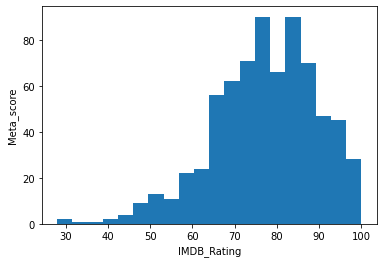

In [14]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(clean_movies_df.loc[:,'Meta_score'],20)
plt.xlabel('IMDB_Rating')
plt.ylabel('Meta_score')
plt.show()


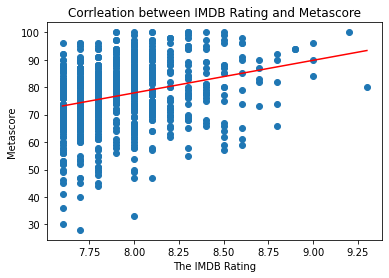

In [15]:
#Correlation between IMDB Rating and Meta score
IMDB_Rating = clean_movies_df['IMDB_Rating']
Meta_score = clean_movies_df['Meta_score']
x_values = IMDB_Rating
y_values = Meta_score
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Corrleation between IMDB Rating and Metascore")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The IMDB Rating')
plt.ylabel('Metascore')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

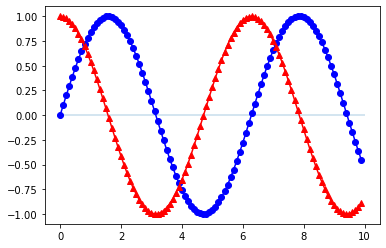

In [16]:
x_axis = np.arange(0, 10, 0.1)
sin = np.sin(x_axis)
cos = np.cos(x_axis)
plt.hlines(0, 0, 10, alpha=0.25)
sine_handle, = plt.plot(x_axis, sin, marker ='o', color='blue', label="Sine")
# Each point on the cosine chart is marked by a red triangle
cosine_handle, = plt.plot(x_axis, cos, marker='^', color='red', label="Cosine")


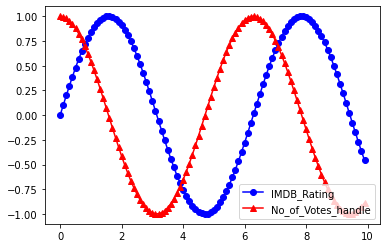

In [17]:
IMDB_Rating_handle, = plt.plot(x_axis, sin, marker ='o', color='blue', label="IMDB_Rating")
# Each point on the cosine chart is marked by a red triangle
No_of_Votes_handle, = plt.plot(x_axis, cos, marker='^', color='red', label="No_of_Votes_handle")
plt.legend(loc="lower right")

The r-squared is: 0.3883062578187025


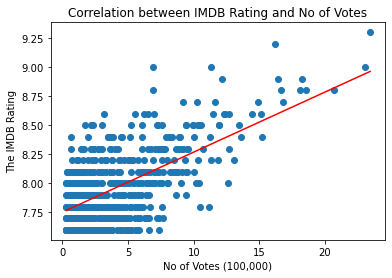

In [18]:
#Correlation between IMDB Rating and No of Votes
No_of_Votes = clean_movies_df['No_of_Votes']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation between IMDB Rating and No of Votes')
plt.xlabel('No of Votes (100,000)')
plt.ylabel('The IMDB Rating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [19]:
Released_Year = clean_movies_df['Released_Year']
The_Meta_Score = clean_movies_df['Meta_score']
Released_Year = ('Released_Year')
x_axis = ,('Meta_score')
plt.bar(x_axis, Released_Year, color='r', alpha=0.5, align="center")

SyntaxError: invalid syntax (Temp/ipykernel_31424/2332752634.py, line 4)

The r-squared is: 0.3883062578187025


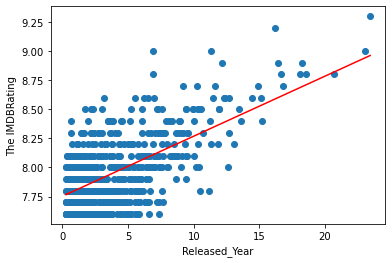

In [20]:
# IMDB Rating Vs Released year 
Released_Year = clean_movies_df['Released_Year']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Released_Year')
plt.ylabel('The IMDBRating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [21]:
# Filter the DataFrame down only to those columns to chart
Movie_Income = clean_movies_df[["IMDB_Rating", "Meta_score"]]

# Set the index to be "State" so they will be used as labels
Movie_Income = Movie_Income.set_index("Meta_score")

Movie_Income.head()

,IMDB_Rating
Meta_score,
80.0,9.3
100.0,9.2
84.0,9.0
90.0,9.0
96.0,9.0


In [22]:
clean_movies_df['Gross'] = clean_movies_df['Gross'].astype('float64')
clean_movies_df['Gross'] = clean_movies_df['Gross'].replace(np.nan, 0)

In [24]:
clean_movies_df['Gross'] = clean_movies_df['Gross'].astype(int)

In [25]:
clean_movies_df.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.280894,0.623142,0.125987
Meta_score,0.280894,1.000000,0.029744,-0.014857
No_of_Votes,0.623142,0.029744,1.000000,0.544828
Gross,0.125987,-0.014857,0.544828,1.000000


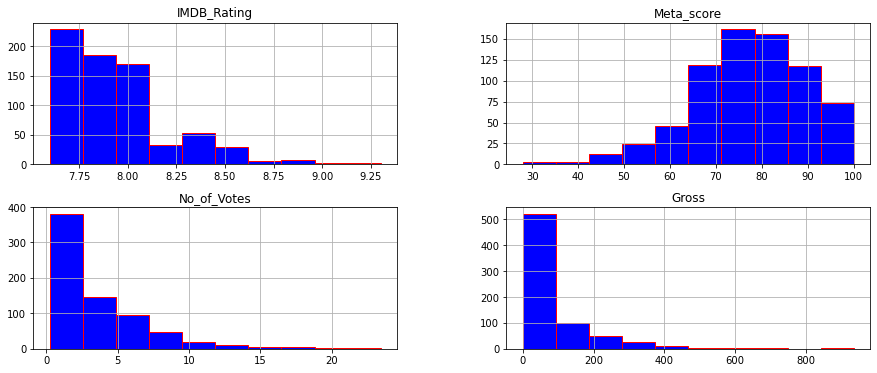

In [27]:
nnumerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
clean_movies_df[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));


In [29]:
clean_movies_df.describe(include = ['O'])

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,714,714,714,714,714,714,714,714,714,714,714,714
unique,714,714,83,12,118,172,714,402,472,599,626,671
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,2014,U,130 min,Drama,Two imprisoned men bond over a number of years...,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,1,28,183,20,58,1,13,12,7,5,4


In [31]:
top_voted = clean_movies_df.sort_values(['No_of_Votes'], ascending = False)

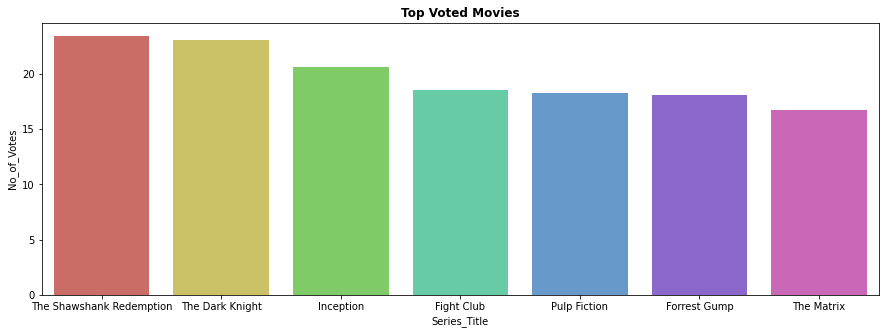

In [33]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

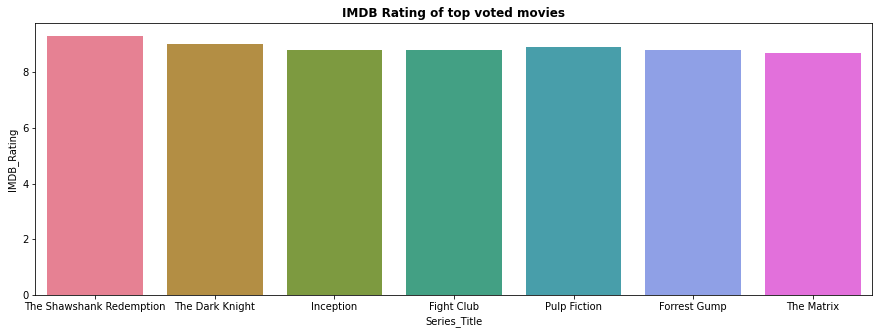

In [34]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()


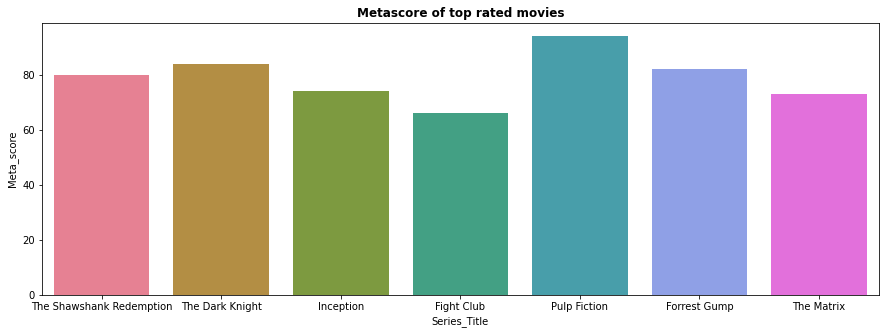

In [36]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [39]:
clean_movies_df.loc[clean_movies_df['Gross']==0]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
31,https://m.media-amazon.com/images/M/MV5BOWE4ZD...,Shichinin no samurai,1954,U,207 min,"Action, Adventure, Drama",8.6,A poor village under attack by bandits recruit...,98.0,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,3.15744,0
51,https://m.media-amazon.com/images/M/MV5BYjJiZj...,Modern Times,1936,G,87 min,"Comedy, Drama, Family",8.5,The Tramp struggles to live in modern industri...,96.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,2.17881,0
52,https://m.media-amazon.com/images/M/MV5BY2I4Mm...,City Lights,1931,G,87 min,"Comedy, Drama, Romance",8.5,"With the aid of a wealthy erratic tippler, a d...",99.0,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,1.67839,0
68,https://m.media-amazon.com/images/M/MV5BMTI3NT...,Oldeuboi,2003,A,101 min,"Action, Drama, Mystery",8.4,After being kidnapped and imprisoned for fifte...,77.0,Chan-wook Park,Choi Min-sik,Yoo Ji-Tae,Kang Hye-jeong,Kim Byeong-Ok,5.15451,0
78,https://m.media-amazon.com/images/M/MV5BZWI3ZT...,Dr. Strangelove or: How I Learned to Stop Worr...,1964,A,95 min,Comedy,8.4,An insane general triggers a path to nuclear h...,97.0,Stanley Kubrick,Peter Sellers,George C. Scott,Sterling Hayden,Keenan Wynn,4.50474,0
88,https://m.media-amazon.com/images/M/MV5BMTg2ND...,Jagten,2012,R,115 min,Drama,8.3,"A teacher lives a lonely life, all the while s...",77.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,2.81623,0
100,https://m.media-amazon.com/images/M/MV5BZTYwZW...,Bacheha-Ye aseman,1997,PG,89 min,"Drama, Family, Sport",8.3,"After a boy loses his sister's pair of shoes, ...",77.0,Majid Majidi,Mohammad Amir Naji,Amir Farrokh Hashemian,Bahare Seddiqi,Nafise Jafar-Mohammadi,0.65341,0
187,https://m.media-amazon.com/images/M/MV5BOWIwOD...,Dial M for Murder,1954,A,105 min,"Crime, Thriller",8.2,A former tennis player tries to arrange his wi...,75.0,Alfred Hitchcock,Ray Milland,Grace Kelly,Robert Cummings,John Williams,1.58335,0
190,https://m.media-amazon.com/images/M/MV5BMTY2MT...,All About Eve,1950,Passed,138 min,Drama,8.2,A seemingly timid but secretly ruthless ingénu...,98.0,Joseph L. Mankiewicz,Bette Davis,Anne Baxter,George Sanders,Celeste Holm,1.20539,0
219,https://m.media-amazon.com/images/M/MV5BMTQ2MD...,Song of the Sea,2014,PG,93 min,"Animation, Adventure, Drama",8.1,"Ben, a young Irish boy, and his little sister ...",85.0,Tomm Moore,David Rawle,Brendan Gleeson,Lisa Hannigan,Fionnula Flanagan,0.51679,0


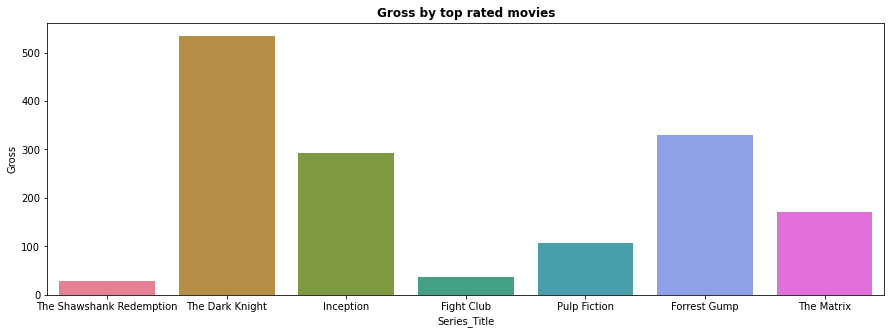

In [41]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

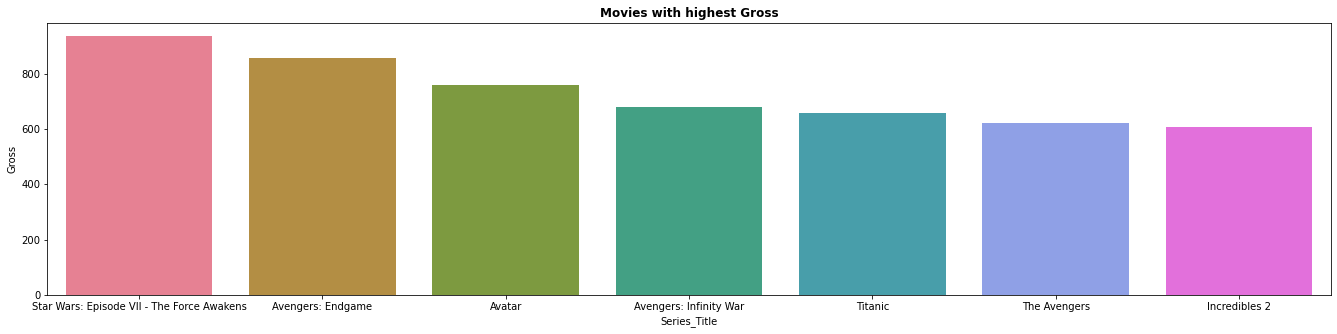

In [43]:
#top movies by Gross
highest_earning = clean_movies_df.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()


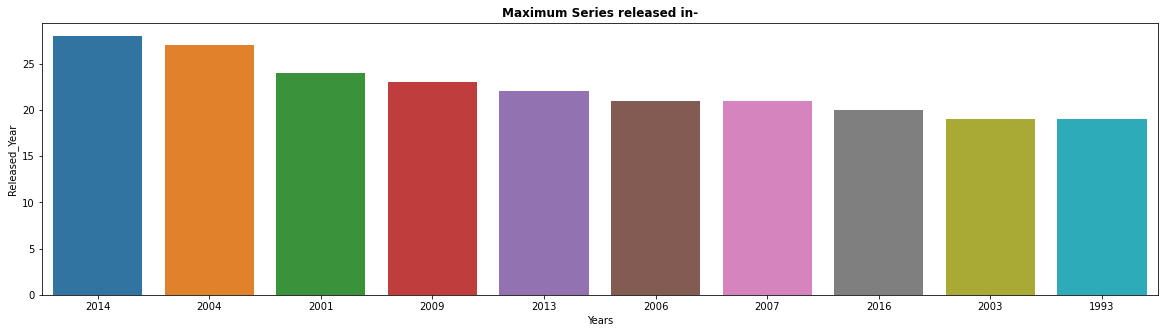

In [47]:
#Maximum movie released in
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=clean_movies_df['Released_Year'].value_counts()[:10].index,y=clean_movies_df['Released_Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()


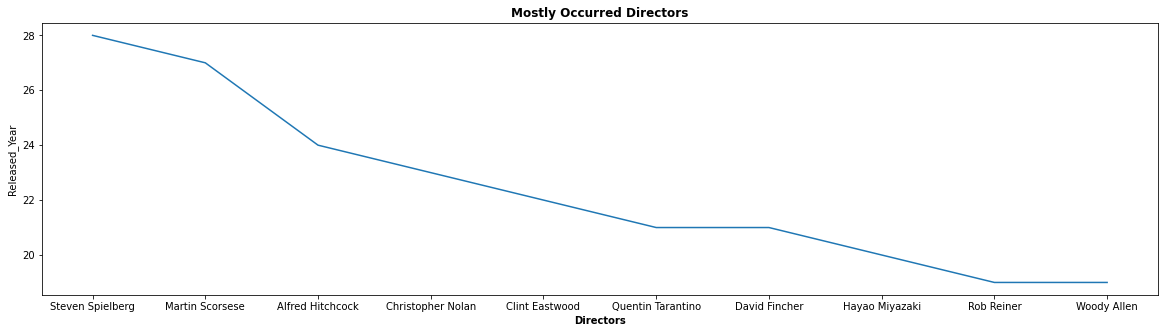

In [48]:
#Mostly occurreted Director line plot
fig,axs=plt.subplots(figsize=(20,5))
g=sns.lineplot(x=clean_movies_df['Director'].value_counts()[:10].index,y=clean_movies_df['Released_Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()


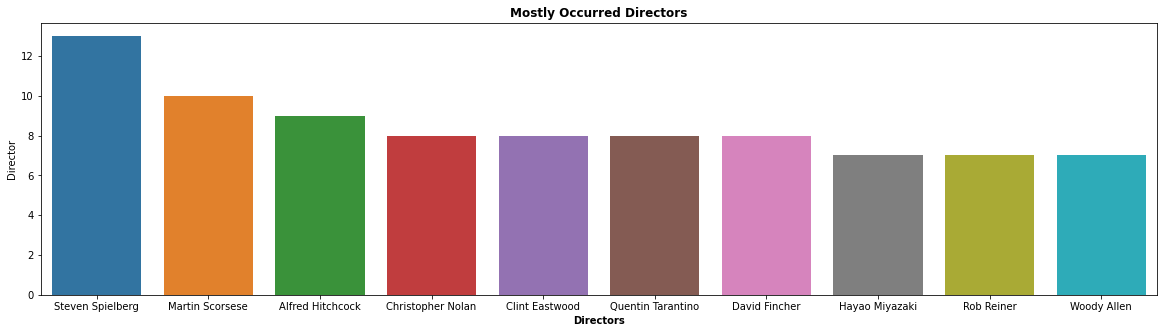

In [49]:
#Mostly occurreted Director bar chart
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=clean_movies_df['Director'].value_counts()[:10].index,y=clean_movies_df['Director'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

In [51]:
#Checking null values in Certificate columns
clean_movies_df['Certificate'].isnull().sum()

0

C:\Users\sarma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


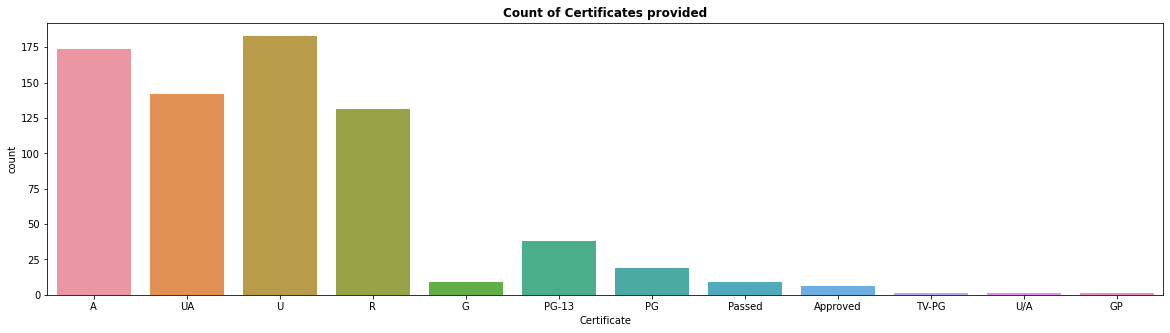

In [52]:
clean_movies_df['Certificate']=clean_movies_df['Certificate'].fillna('Not Rated')

certificates=clean_movies_df[clean_movies_df['Certificate']!='Not Rated']['Certificate']
fig,axs=plt.subplots(figsize=(20,5))
g=sns.countplot(certificates)
g.set_title("Count of Certificates provided", weight = "bold")
plt.show()

C:\Users\sarma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


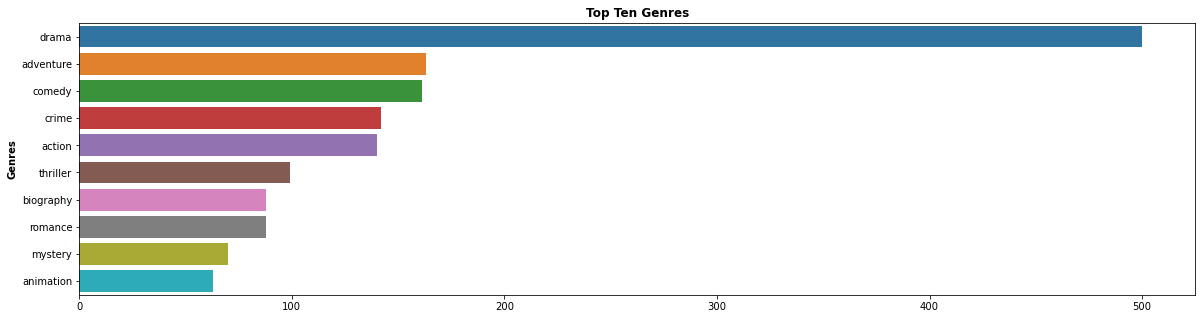

In [54]:
#Top 10 Genres
from collections import Counter
genre=[]
for x in clean_movies_df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(y,x)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top Ten Genres", weight = "bold")
plt.show()
